<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#wine-dataset" data-toc-modified-id="wine-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>wine dataset</a></span><ul class="toc-item"><li><span><a href="#data-load" data-toc-modified-id="data-load-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>data load</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>EDA</a></span></li></ul></li><li><span><a href="#Dummy-Classifier" data-toc-modified-id="Dummy-Classifier-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dummy Classifier</a></span></li><li><span><a href="#pipeline" data-toc-modified-id="pipeline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>pipeline</a></span><ul class="toc-item"><li><span><a href="#pipeline-tool" data-toc-modified-id="pipeline-tool-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>pipeline tool</a></span></li><li><span><a href="#scikit-learn-Pipeline" data-toc-modified-id="scikit-learn-Pipeline-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>scikit-learn Pipeline</a></span></li></ul></li><li><span><a href="#차원-축소" data-toc-modified-id="차원-축소-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>차원 축소</a></span><ul class="toc-item"><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Filter" data-toc-modified-id="Filter-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Filter</a></span></li><li><span><a href="#Wrapper" data-toc-modified-id="Wrapper-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Wrapper</a></span></li><li><span><a href="#Embed" data-toc-modified-id="Embed-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Embed</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Extraction</a></span></li></ul></div>

# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/8th_ai_lecture_fundamental](https://github.com/realblack0/8th_ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## wine dataset

### data load

In [25]:
from sklearn.datasets import load_wine

In [2]:
data =load_wine()

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [4]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
import pandas as pd

In [7]:
data_pd = pd.DataFrame(data.data, columns=data.feature_names)

In [8]:
data_target = pd.DataFrame(data.target, columns=['target'])

In [9]:
wine = pd.concat([data_pd, data_target], axis=1)

In [10]:
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### EDA

In [11]:
# feature의 수에 비해서 data 개수가 너무 적은 것으로 뵝ㄴ다.
# 차원의 저주를 의심해본다.
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [12]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


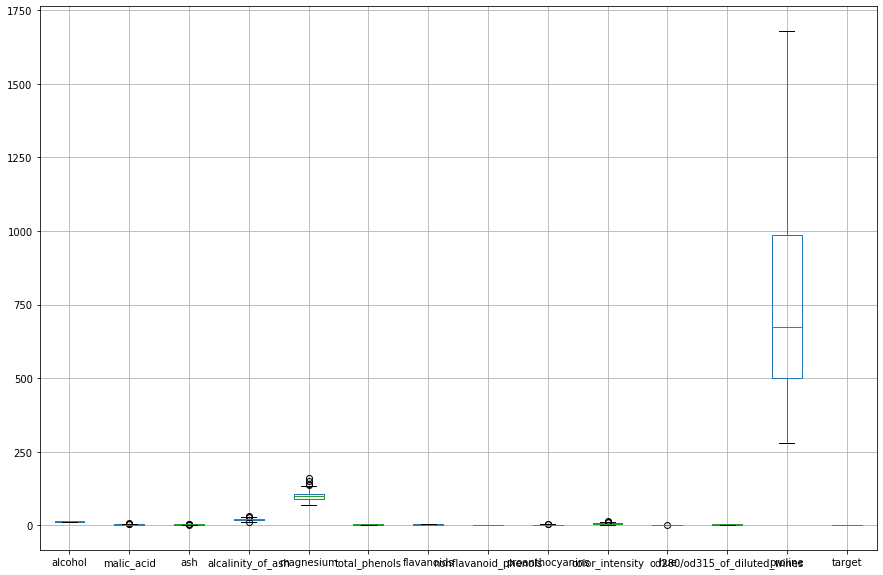

In [15]:
# proline 이 값의 범위가 너무 커서 다른 feature가 잘 안보인다.
# standardization 또는 MinMaxScale하는 방법을 생각해볼 수 있다. 
wine.boxplot(figsize=(15,10))

In [16]:
wine.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [17]:
import seaborn as sns

C:\Users\JINHYO\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# AttributeError: 'QuadMesh' object has no property 'figsize'
# seaborn은 figsize를 인자로 사용할 수 없다.
sns.heatmap(wine.corr(), cbar=True, figsize=(10, 10))

In [20]:
import matplotlib.pyplot as plt

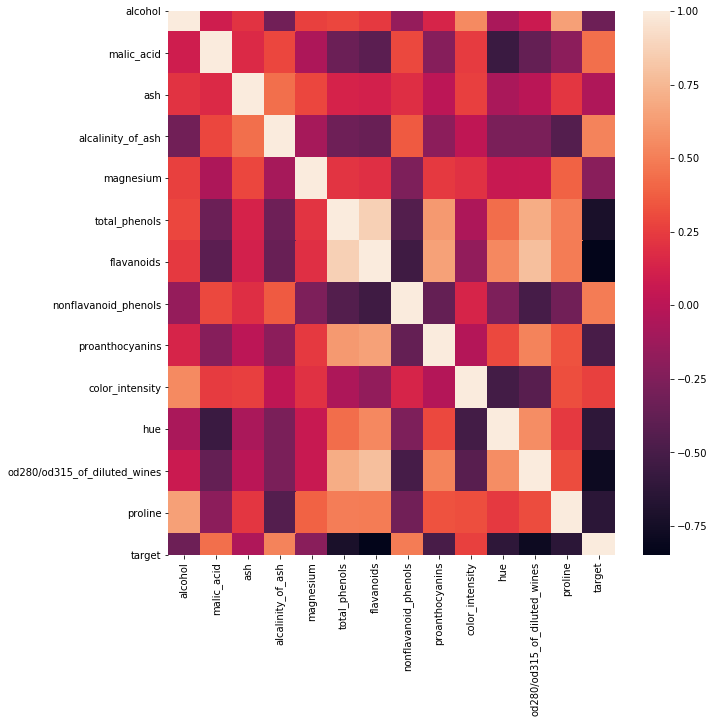

In [22]:
# seaborn은 matplotlib으로 만들어졌기 때문에 연동할 수 있다.
# state-machine 방식으로 조정할 수 있다.
plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(), cbar=True)

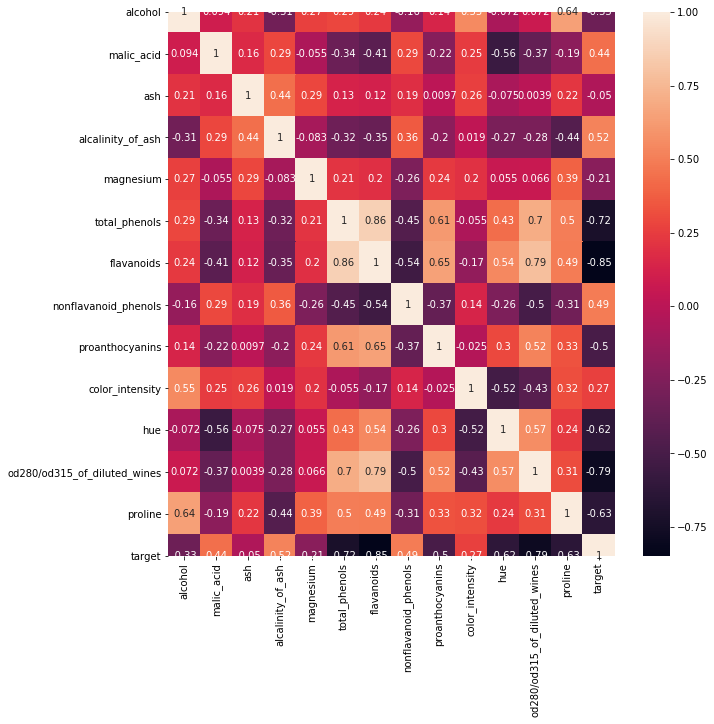

In [23]:
# annot은 색 위에 숫자값을 표기해준다. 
# cbar는 색상에 대한 주석을 표시한다.
plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(), cbar=True, annot=True)

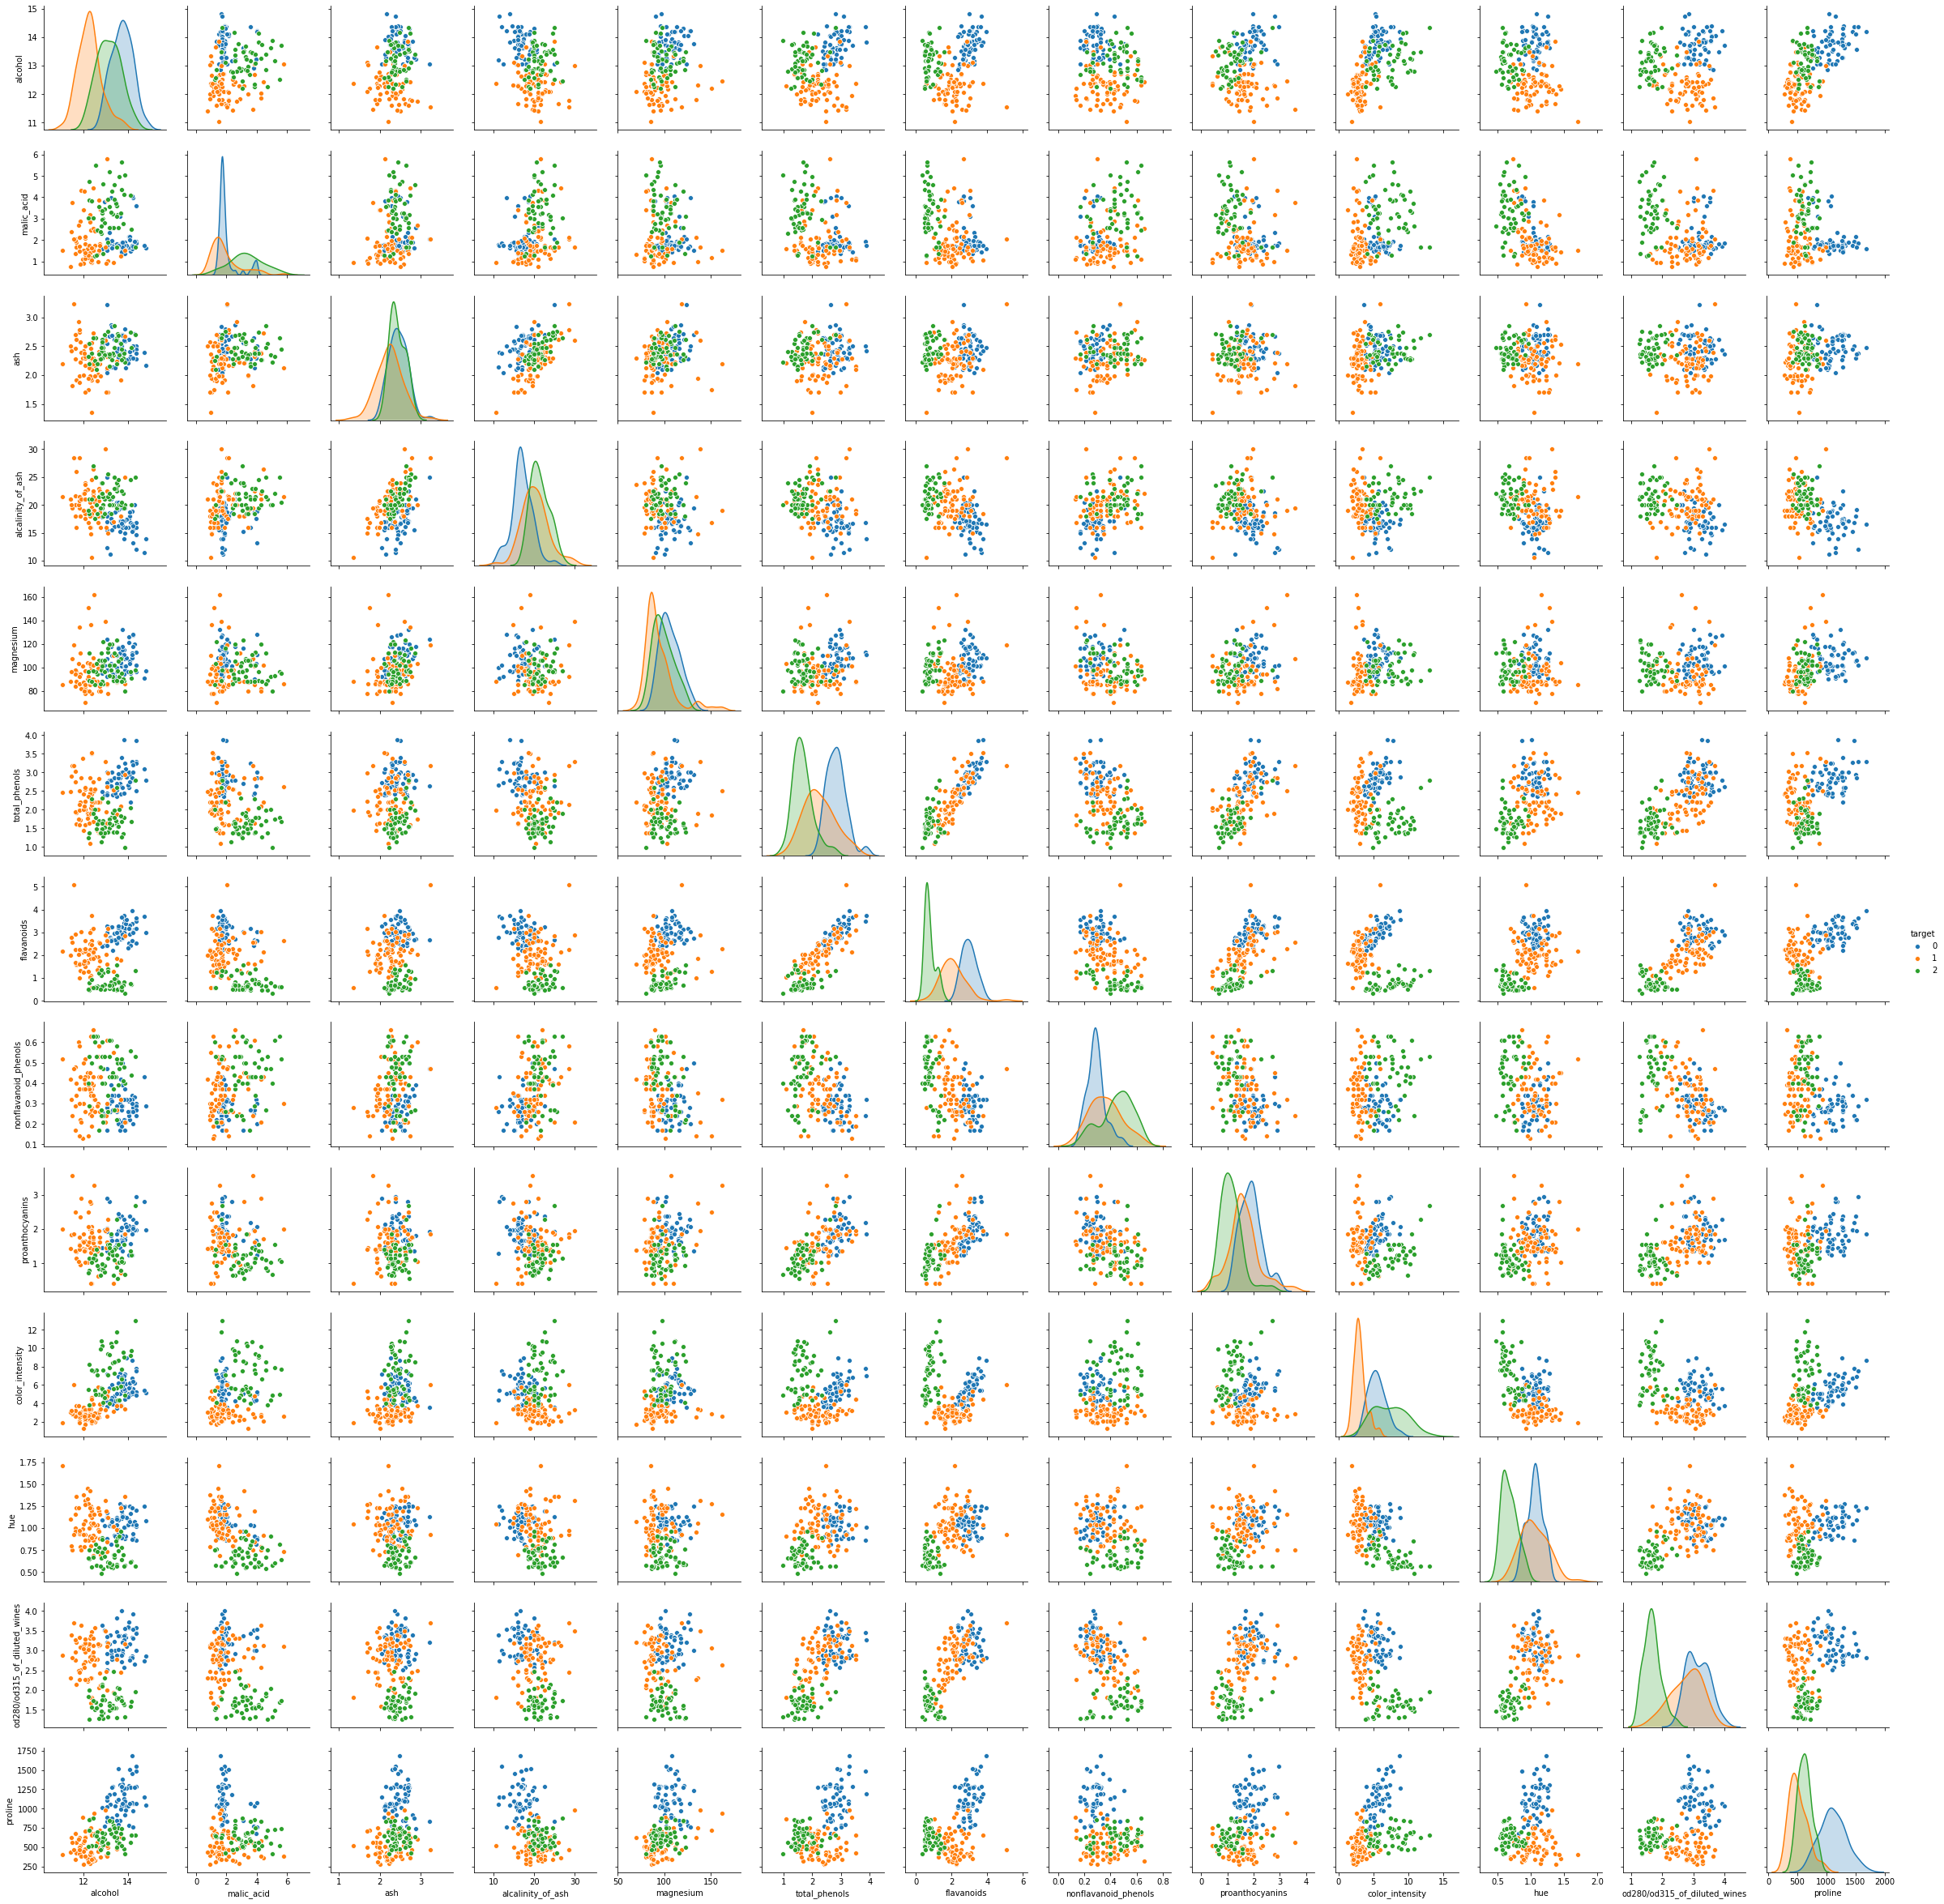

In [24]:
# 직선으로 잘 분류될 수 있을 것인지 생각해본다. 
sns.pairplot(wine, hue='target')

In [26]:
plt.style.use('ggplot')

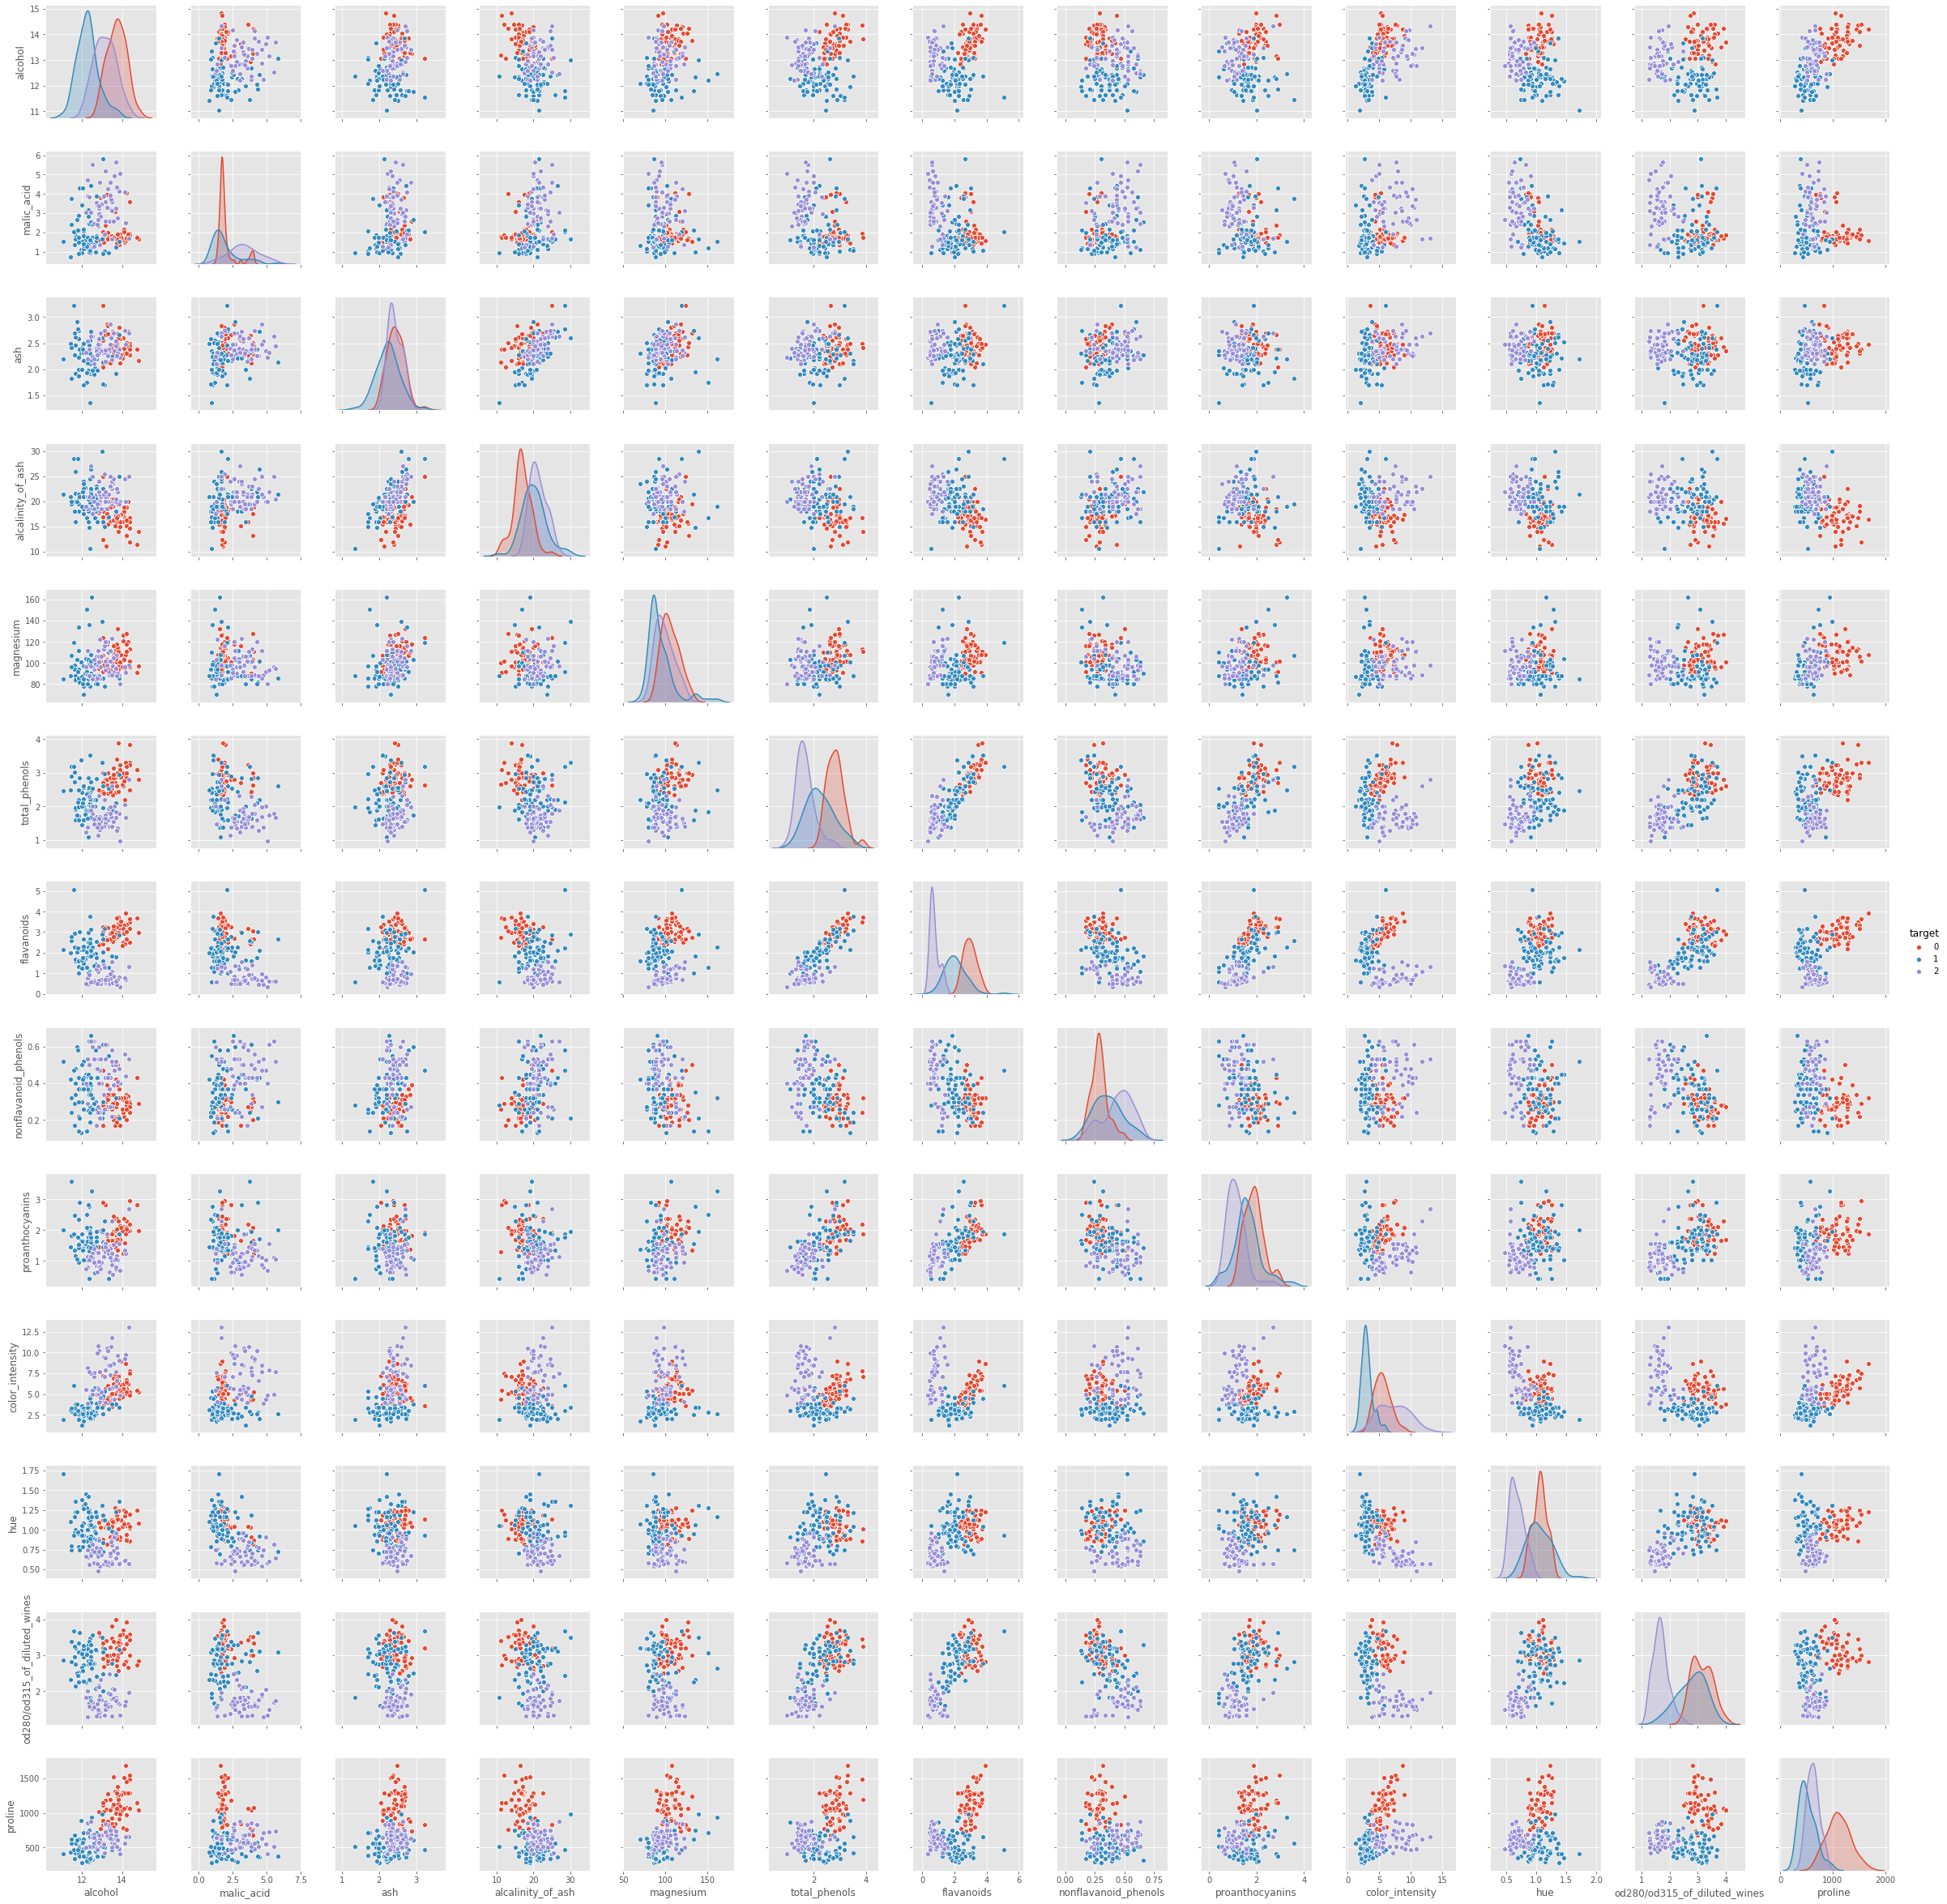

In [27]:
# seaborn이 잘 안보이면 스타일을 바꿀 수 있다. 
# seaborn은 matplotlib으로 만들어졌기 때문에, matplotlib의 스타일을 바꾸면 똑같이 영향을 받는다.

# 직선으로는 나누기 어려워 보인다.
# 그렇다면 복잡하지 않은 곡선으로는 나눌 수 있을 것인가 생각해본다.
# 복잡하지 않은 곡선으로는 잘 구분할 수 있을 것 같다.
sns.pairplot(wine, hue='target')

Multi-class 문제는 2가지 접근법으로 해결할 수 있다. 
- one vs one
- one vs rest(all)

In [28]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score()

## Dummy Classifier

`dummy classifier`는 사람이 모델처럼 예측하는 방식으로 만든 알고리즘이다.

In [29]:
# 정답 1이 178 중 71개 있다. (most_frequent)
# 비율상으로, 모두 1로 예측한다해도 71/178의 성능은 낼 수 있다. 
wine.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [31]:
from sklearn.dummy import DummyClassifier

In [32]:
dc = DummyClassifier()

In [35]:
cross_val_score(dc, wine.iloc[:,:-1], 
                wine.target, 
                cv=10)

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


array([0.33333333, 0.27777778, 0.22222222, 0.5       , 0.44444444,
       0.44444444, 0.33333333, 0.22222222, 0.41176471, 0.29411765])

In [ ]:
# imbalace dataset
# 금융사기 0.001%
# 10,000,000 개 데이터 중에서, 9,999,999개가 사기가 아니다. 
# 모두 사기가 아니라고 예측해도 정확도가 아주 높게 나온다.
# 이 경우에는, dummy 알고리즘만 써도 성능이 잘 나온다. 

In [ ]:
# 우리가 만들 모델은 적어도 dummy 알고리즘보다는 성능이 잘 나와야 한다.
# 실무에서 가장 먼저 할 일은, 머신러닝을 사용하지 않고 해결할 수 있는 방법을 찾는 것이다.
# dummy model의 성능과 차이가 별로 없으면, 기계학습을 사용하지 않는 방법을 강구한다.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# 편차가 크다. -> 실무에 사용하기는 무리가 있다.
cross_val_score(KNeighborsClassifier(), wine.iloc[:, :-1], wine.target, cv=10)

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

In [36]:
import mglearn

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


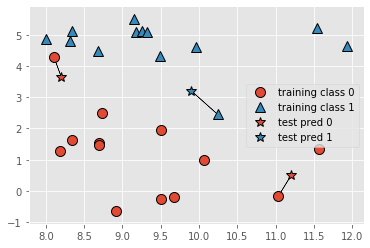

In [41]:
# KNN은 거리 기반으로 유사한 데이터를 찾는 방식이다.
# 어떤 feature가 다른 feature보다 값의 범위(scale)이 크면, 거리를 잴때 크게 차이 날 것이다.
mglearn.plot_knn_classification.plot_knn_classification()

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
ss = StandardScaler()

In [ ]:
# Error
# shape을 잘 맞춰줘야 한다.
ss.fit_transform(wine.proline)

In [49]:
# scale이 유독 큰 proline을 표준화 시킨다. 
ss.fit_transform(wine.proline.values.reshape(-1,1))

array([[ 1.01300893],
       [ 0.96524152],
       [ 1.39514818],
       [ 2.33457383],
       [-0.03787401],
       [ 2.23903902],
       [ 1.72952002],
       [ 1.74544249],
       [ 0.94931905],
       [ 0.94931905],
       [ 2.43010864],
       [ 1.69767508],
       [ 1.82505483],
       [ 1.28369089],
       [ 2.54793491],
       [ 1.79320989],
       [ 1.69767508],
       [ 1.22000102],
       [ 2.97147258],
       [ 0.3124203 ],
       [ 0.10542821],
       [ 0.07358327],
       [ 0.91747411],
       [ 0.85378424],
       [ 0.3124203 ],
       [ 0.2646529 ],
       [ 1.42699311],
       [ 1.71359755],
       [ 0.53533487],
       [ 0.91747411],
       [ 1.71359755],
       [ 2.44603111],
       [ 0.7741719 ],
       [ 1.55437286],
       [ 1.10854374],
       [ 0.55125733],
       [ 0.42387759],
       [ 1.14038868],
       [ 0.86970671],
       [ 0.04173834],
       [ 0.15319562],
       [ 0.91747411],
       [ 1.10854374],
       [-0.21302116],
       [ 0.43980005],
       [ 1

In [50]:
# 원본 보관
wine_raw = wine.copy()

In [51]:
wine['proline'] = ss.fit_transform(wine[['proline']])

In [52]:
# 전처리해서 만든 모델은, 그대로 사용하면 안된다.
# 새로운 데이터를 예측할 때, 모델 만들때와 같은 방식으로 전처리해야 한다.
# 예를 들어, proline을 표준화(StandardScale)해서 만든 모델은 사용할 때 proline을 항상 표준화해야 한다.
# pipeline을 만들면 유용하다.
cross_val_score(KNeighborsClassifier(), wine.iloc[:,:1], wine.target, cv=10)

array([0.72222222, 0.55555556, 0.72222222, 0.55555556, 0.72222222,
       0.72222222, 0.61111111, 0.66666667, 0.76470588, 0.82352941])

## pipeline

### pipeline tool

- orange data mining
    - 설치방법
        - anaconda navigator에서 orange3를 설치하거나
        - 직접 홈페이지에서 [다운로드](https://orange.biolab.si/download/#windows)
    - 장점
        - 실제 가능한지 feasibility 테스트용으로 좋다.  
        - GUI로 쉽게 만들 수 있다.  
    - 단점
        - 시스템화 시키기는 어렵다. (우리 과정은 python으로 시스템화까지 목표)  
        - 데이터 규모가 너무 커지면 느려지기 시작함
    - 비슷한 프로그램
        - azure
        - rapidminer (좀 더 실무적)

### scikit-learn Pipeline

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
dir(Pipeline) # 처음보면 dir

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_inverse_transform',
 '_iter',
 '_log_message',
 '_more_tags',
 '_pairwise',
 '_replace_estimator',
 '_required_parameters',
 '_set_params',
 '_transform',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decision_function',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'named_steps',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'score_samples',
 'set_params',
 'tran

In [55]:
# shift + tab 해본다.
# step's' -> 파라미터명이 복수형이면 보통 list로 묶어서 넣는다.
# (name, transform) 형태로 넣어야한다.
# final estimator -> estimator는 알고리즘 인스턴스이다.
pipe = Pipeline([('Standard Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

In [56]:
# 원본데이터 사용한다.
pipe.fit(wine_raw.iloc[:,:-1], wine_raw.target)

Pipeline(memory=None,
         steps=[('Standard Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [57]:
# pipe는 데이터를 standard scaling해준 후 knn 알고리즘을 사용하는 절차를 한번에 해준다.
cross_val_score(pipe, wine_raw.iloc[:,:-1], wine_raw.target, cv=10)

array([1.        , 0.94444444, 0.94444444, 0.94444444, 1.        ,
       0.94444444, 1.        , 1.        , 0.94117647, 0.94117647])

In [58]:
vars(pipe)

{'steps': [('Standard Scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('KNN',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                        weights='uniform'))],
 'memory': None,
 'verbose': False}

In [59]:
pipe.steps

[('Standard Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform'))]

In [60]:
# 구성요소 하나씩 뽑아낼 수 있다. 
pipe.steps[1][1]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
# pipeline은 만드는 방법이 조금 복잡한 면이 있다.
# list 안에 tuple로 넣어야하고, 튜플은 이름과 객체로 묶어야하고, 맨 마지막은 알고리즘이어야 한다.
pipe = Pipeline([('Standard Scaler', StandardScaler()), ('MinMax', MinMaxScaler()), ('KNN', KNeighborsClassifier())])

In [63]:
# Pipeline을 좀 더 쉽게 만드는 방법
from sklearn.pipeline import make_pipeline

In [64]:
# shift + tab
# *steps : 가변 포지셔널
# make_pipeline의 특징 : 네임을 알아서 정해준다.
make_pipeline(MinMaxScaler(), StandardScaler(), KNeighborsClassifier())

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

## 차원 축소

- 데이터의 의미를 지니면서 차원 축소
- 데이터의 의미를 지니지 않고 차원 축소

In [69]:
wine.drop(columns='flavanoids', inplace=True)

In [70]:
# column이 많을 수록 데이터를 풍부하게 설명해주므로 좋다.
# 단, 그만큼 데이터가 더 많이 필요하다.
# 단, 같은 성능일 때는 column이 적은게 좋다. (오캄의 면도칼)
cross_val_score(KNeighborsClassifier(), wine.iloc[:,:-1], wine.target, cv=10)

array([0.61111111, 0.94444444, 0.72222222, 0.88888889, 0.83333333,
       0.88888889, 0.72222222, 1.        , 0.82352941, 0.82352941])

In [72]:
# column 삭제하기 전의 성능
# _숫자 -> jupyter notebook에서 특정 셀의 결과값을 가져오는 기법
_52

array([0.72222222, 0.55555556, 0.72222222, 0.55555556, 0.72222222,
       0.72222222, 0.61111111, 0.66666667, 0.76470588, 0.82352941])

### Feature Selection

- Filter
- Wrapper
- Embed

최근에는 AutoML과 딥러닝이 부상했기 때문에, Feature selection은 크게 중요하지 않아졌다.  
비슷한 이름으로 Feature Extraction도 있지만, 이 방법도 AutoML과 딥러닝으로 중요도가 낮아졌다.    
딥러닝은 Feature Extraction(selection도 포함)을 사람이 직접하지 않고 알고리즘이 알아서 한다. 

Feature Selection은 feature 중에서 유의미한 것을 선택적으로 학습에 사용하는 방법이고,  
Feature Extraction은 feature를 가공해서 유의미한 feature로 만들어내는 방법이다. 



#### Filter

통계적인 방법으로 유의미한 feature를 선택한다.

In [73]:
from sklearn.feature_selection import chi2, SelectKBest

In [75]:
# SeleectKBest는 통계값 기준으로 상위 K개의 feature를 선택한다.
# chi2는 통계값을 측정하는 함수이다.
skb = SelectKBest(chi2)

In [ ]:
# TypeError: fit() missing 1 required positional argument: 'y'
# y가 있어야한다.
skb.fit_transform(wine_raw)

In [76]:
# 정답과 비교해서 중요도를 매긴다.
skb.fit_transform(wine_raw.iloc[:,:-1], wine_raw.target)

array([[  14.23,    1.71,   15.6 , ...,    5.64,    3.92, 1065.  ],
       [  13.2 ,    1.78,   11.2 , ...,    4.38,    3.4 , 1050.  ],
       [  13.16,    2.36,   18.6 , ...,    5.68,    3.17, 1185.  ],
       ...,
       [  13.27,    4.28,   20.  , ...,   10.2 ,    1.56,  835.  ],
       [  13.17,    2.59,   20.  , ...,    9.3 ,    1.62,  840.  ],
       [  14.13,    4.1 ,   24.5 , ...,    9.2 ,    1.6 ,  560.  ]])

In [78]:
# scores를 보고, 점수가 높은 10개만 써서 학습을 한다.
vars(skb)

{'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>,
 'k': 10,
 'scores_': array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
        4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
        9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
        1.65400671e+04]),
 'pvalues_': array([6.56938863e-02, 8.03489047e-07, 6.89567769e-01, 4.16304971e-07,
        1.66972759e-10, 4.05034646e-04, 1.76656548e-14, 4.03433989e-01,
        9.24066398e-03, 2.12488671e-24, 7.49248322e-02, 8.33587826e-06,
        0.00000000e+00])}

In [79]:
dir(skb)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_params',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 'fit',
 'fit_transform',
 'get_params',
 'get_support',
 'inverse_transform',
 'k',
 'pvalues_',
 'score_func',
 'scores_',
 'set_params',
 'transform']

In [80]:
# 값이 클수록 통계적으로 유의미한 feature이다.
# 5번째 feature는 점수가 낮다.
skb.scores_

array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
       4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
       9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
       1.65400671e+04])

In [82]:
wine_raw.columns[5]

'total_phenols'

In [81]:
wine_raw2 = wine_raw.copy()

In [84]:
wine_raw.drop(columns='total_phenols', inplace=True)

In [86]:
cross_val_score(KNeighborsClassifier(), wine_raw.iloc[:,:-1], wine_raw.iloc[:,-1], cv=10)

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

In [87]:
# 전처리하지 않고 KNN으로 cross_val_score했던 결과이다.
# total_phenols를 버리고 학습했을 때와 차이가 없다.
# total_phenols는 중요하지 않은 feature였다.
_40

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

In [89]:
iris = sns.load_dataset('iris')

In [88]:
skb2 = SelectKBest(chi2, 3)

In [90]:
skb2.fit_transform(iris.iloc[:,:-1], iris.species)

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [91]:
vars(skb2)

{'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>,
 'k': 3,
 'scores_': array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 'pvalues_': array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15])}

In [92]:
# iris에서 모든 feature를 사용한 경우
cross_val_score(KNeighborsClassifier(), iris.iloc[:,:-1], iris.species, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [93]:
iris2 = iris.drop(columns='sepal_width')

In [94]:
# sepal_width를 버리고 학습한 결과가 버리지 않았을 때와 거의 차이나지 않는다.
# 어떤 사람은 10개 중 하나가 7% 떨어진것도 큰 손실이라고 보기도 한다.
cross_val_score(KNeighborsClassifier(), iris2.iloc[:,:-1], iris2.species, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [120]:
iris.species = iris.species.map({'setosa':0, 'virginica':1, 'versicolor':2})

In [121]:
from sklearn.feature_selection import f_regression

In [122]:
skb3 = SelectKBest(f_regression, 3)

In [123]:
skb3.fit(iris.iloc[:,:-1], iris.species)

SelectKBest(k=3, score_func=<function f_regression at 0x000001D7ADEC5BF8>)

In [124]:
# 이번에는 sepal_length가 가장 중요도가 낮게 나왔다.
vars(skb3)

{'score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, center=True)>,
 'k': 3,
 'scores_': array([ 39.73054679,  91.6308455 , 107.84066733,  75.17305368]),
 'pvalues_': array([3.16860576e-09, 3.41564946e-17, 2.56684388e-19, 7.02612064e-15])}

In [128]:
iris3 = iris.drop(columns='sepal_length')

In [129]:
# 모든 feature를 사용했을 때와 같다.
# sepal_length는 중요한 feature가 아니다.
cross_val_score(KNeighborsClassifier(), iris3.iloc[:,:-1], iris3.species, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

#### Wrapper

wrapper는 알고리즘과 같이 사용하는 방법이다.  
가능한 조합을 모두 만들어서 모두 테스트해보는 방법이다.  
무식해보이지만 컴퓨터의 성능이 좋으면 가능하다.

In [130]:
# Recursive Feature Elimination
# feature를 하나씩 지워보면서 가장 성능 좋은 조합을 찾는다.
from sklearn.feature_selection import RFE

In [132]:
# estimator는 알고리즘 인스턴스
# 알고리즘마다 영향력이 큰 feature가 다르다.
rfe = RFE(KNeighborsClassifier())

In [ ]:
# RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes
# coef_는 선형 알고리즘에서 나온다. (coefficient:기울기)
# feature_importances_가 있는 알고리즘을 배운적이 있다 : DecisionTree
rfe.fit_transform(iris.iloc[:,:-1], iris.iloc[:, -1])

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
rfe = RFE(DecisionTreeClassifier())

In [165]:
rfe.fit_transform(iris.iloc[:,:-1], iris.iloc[:, -1])

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [166]:
# support_를 보면 중요한 feature만 True이다.
# 통계쪽이 아닌, CS쪽 사람들은 모두 Wrapper 방식을 사용한다.
vars(rfe)

{'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'n_features_to_select': None,
 'step': 1,
 'verbose': 0,
 'estimator_': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'n_features_': 2,
 'support_': array([False, F

In [146]:
from sklearn.linear_model import LogisticRegression

In [158]:
rfe2 = RFE(LogisticRegression(), 3)

In [159]:
rfe2.fit_transform(iris.iloc[:, :-1], iris.iloc[:, -1])

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2],
       [2.9, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.7, 1.5, 0.2],
       [3.4, 1.6, 0.2],
       [3. , 1.4, 0.1],
       [3. , 1.1, 0.1],
       [4. , 1.2, 0.2],
       [4.4, 1.5, 0.4],
       [3.9, 1.3, 0.4],
       [3.5, 1.4, 0.3],
       [3.8, 1.7, 0.3],
       [3.8, 1.5, 0.3],
       [3.4, 1.7, 0.2],
       [3.7, 1.5, 0.4],
       [3.6, 1. , 0.2],
       [3.3, 1.7, 0.5],
       [3.4, 1.9, 0.2],
       [3. , 1.6, 0.2],
       [3.4, 1.6, 0.4],
       [3.5, 1.5, 0.2],
       [3.4, 1.4, 0.2],
       [3.2, 1.6, 0.2],
       [3.1, 1.6, 0.2],
       [3.4, 1.5, 0.4],
       [4.1, 1.5, 0.1],
       [4.2, 1.4, 0.2],
       [3.1, 1.5, 0.2],
       [3.2, 1.2, 0.2],
       [3.5, 1.3, 0.2],
       [3.6, 1.4, 0.1],
       [3. , 1.3, 0.2],
       [3.4, 1.5, 0.2],
       [3.5, 1.3, 0.3],
       [2.3, 1.3

In [160]:
vars(rfe2)

{'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'n_features_to_select': 3,
 'step': 1,
 'verbose': 0,
 'estimator_': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'n_features_': 3,
 'support_': array([False,  True,  True,  True]),
 'ranking_': array([2, 1, 1, 1])}

---

In [167]:
pipe = Pipeline([('Standars Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

In [ ]:
# AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'
pipe.decision_function

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


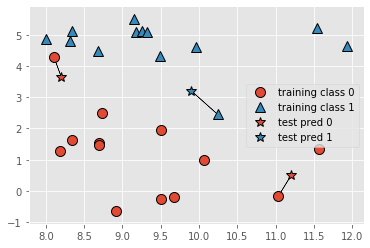

In [169]:
# KNN은 데이터가 주어졌을 때, 기존 학습 데이터와 거리를 비교하는 방식이기 떄문에 decision boundary를 형성할 수 없다.
# 따라서 decision_fucntion 메소드가 없다.
mglearn.plot_knn_classification.plot_knn_classification()

In [172]:
# Logistic regression은 decision boundary를 그릴 수 있는 알고리즘이다. 
pipe = Pipeline([('Standars Scaler', StandardScaler()), ('Logistic', LogisticRegression())])

In [173]:
pipe.decision_function

<function sklearn.pipeline.Pipeline.decision_function(self, X)>

---

blackbox모델은 wrapper 방식이 좋고.  
whitebox모델은 filter 방식이 좋다. 

#### Embed

알고리즘 내부에서 feature의 중요성을 계산하는 방법이다.  
알고리즘자체가 기능을 지원해야한다.

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rfc = RandomForestClassifier()

In [175]:
rfc.fit(iris.iloc[:, :-1], iris.iloc[:,-1])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [176]:
rfc.feature_importances_

array([0.11398129, 0.02288148, 0.42995867, 0.43317857])

## Feature Extraction

In [177]:
from sklearn.feature_extraction import DictVectorizer

In [178]:
dv = DictVectorizer()

In [180]:
dv.fit_transform([{'foo':1, 'bar':2}, {'foo':3, 'baz':1}]).toarray()

array([[2., 0., 1.],
       [0., 1., 3.]])